In [66]:
#Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix #for assemessment, we might use another one

In [67]:
#Import training dataset
techscape = pd.read_csv('techscape-ecommerce/train.csv')

In [68]:
#Converting the date into months
dates = pd.to_datetime(techscape.Date)
techscape['Date'] = dates.dt.month
techscape

,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy
0,102863333,3,0,0.0,0,0.0,3,64.0000,0.0000,0.0667,0.0000,MacOSX,2,Portugal,1,Returner,0
1,103117814,5,0,0.0,0,0.0,23,684.5000,0.0217,0.0449,0.0000,Windows,2,France,6,Returner,0
2,103201891,12,0,0.0,0,0.0,8,95.0000,0.0250,0.0583,0.0000,Windows,4,Italy,1,Returner,0
3,103226087,12,0,0.0,0,0.0,9,608.7500,0.0000,0.0250,42.4225,Windows,2,United Kingdom,2,Returner,1
4,103234445,11,0,0.0,2,386.0,36,1609.9397,0.0000,0.0093,12.5033,Windows,2,Spain,3,Returner,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,798279589,5,3,159.0,2,55.5,23,1100.1250,0.0000,0.0111,0.0000,MacOSX,2,Brazil,14,Returner,0
9995,798314158,7,6,175.1,0,0.0,3,27.6000,0.0000,0.0111,0.0000,Windows,10,Spain,5,New_Access,0
9996,798339820,3,0,0.0,0,0.0,27,644.0000,0.0077,0.0519,0.0000,MacOSX,2,France,3,Returner,0
9997,798371242,5,0,0.0,0,0.0,53,715.5000,0.0226,0.0363,0.0000,Windows,2,Italy,3,Returner,0


In [69]:
techscape = techscape.set_index('Access_ID')
techscape

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy
Access_ID,,,,,,,,,,,,,,,,
102863333,3,0,0.0,0,0.0,3,64.0000,0.0000,0.0667,0.0000,MacOSX,2,Portugal,1,Returner,0
103117814,5,0,0.0,0,0.0,23,684.5000,0.0217,0.0449,0.0000,Windows,2,France,6,Returner,0
103201891,12,0,0.0,0,0.0,8,95.0000,0.0250,0.0583,0.0000,Windows,4,Italy,1,Returner,0
103226087,12,0,0.0,0,0.0,9,608.7500,0.0000,0.0250,42.4225,Windows,2,United Kingdom,2,Returner,1
103234445,11,0,0.0,2,386.0,36,1609.9397,0.0000,0.0093,12.5033,Windows,2,Spain,3,Returner,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798279589,5,3,159.0,2,55.5,23,1100.1250,0.0000,0.0111,0.0000,MacOSX,2,Brazil,14,Returner,0
798314158,7,6,175.1,0,0.0,3,27.6000,0.0000,0.0111,0.0000,Windows,10,Spain,5,New_Access,0
798339820,3,0,0.0,0,0.0,27,644.0000,0.0077,0.0519,0.0000,MacOSX,2,France,3,Returner,0


In [70]:
#Drop OS
techscape.drop(['OS'],axis=1,inplace=True)

In [71]:
#Drop the rows with type of visitor other
#techscape_processed = techscape_processed[techscape_processed['Type_of_Visitor'].isin(['New_Access','Returner'])]

In [72]:
#Drop the browser, country, AccountMng_Duration, FAQ_Duration, Product_Duration
techscape.drop(['Browser','Country','AccountMng_Duration', 'FAQ_Duration', 'Product_Duration'], axis=1, inplace=True)
techscape

,Date,AccountMng_Pages,FAQ_Pages,Product_Pages,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Type_of_Traffic,Type_of_Visitor,Buy
Access_ID,,,,,,,,,,
102863333,3,0,0,3,0.0000,0.0667,0.0000,1,Returner,0
103117814,5,0,0,23,0.0217,0.0449,0.0000,6,Returner,0
103201891,12,0,0,8,0.0250,0.0583,0.0000,1,Returner,0
103226087,12,0,0,9,0.0000,0.0250,42.4225,2,Returner,1
103234445,11,0,2,36,0.0000,0.0093,12.5033,3,Returner,1
...,...,...,...,...,...,...,...,...,...,...
798279589,5,3,2,23,0.0000,0.0111,0.0000,14,Returner,0
798314158,7,6,0,3,0.0000,0.0111,0.0000,5,New_Access,0
798339820,3,0,0,27,0.0077,0.0519,0.0000,3,Returner,0


In [73]:
#HOT ENCODING CATEGORICALS
typevisitor_ohe = pd.get_dummies(techscape.Type_of_Visitor, prefix='Visitor')
#Try with and without traffic
#typetraffic_ohe = pd.get_dummies(techscape.Type_of_Traffic, prefix='Traffic')

techscapeprocessed_ohe = pd.concat([techscape, typevisitor_ohe], axis=1)
techscapeprocessed_ohe.drop(['Type_of_Visitor'], axis=1, inplace=True)
techscapeprocessed_ohe


,Date,AccountMng_Pages,FAQ_Pages,Product_Pages,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Type_of_Traffic,Buy,Visitor_New_Access,Visitor_Other,Visitor_Returner
Access_ID,,,,,,,,,,,,
102863333,3,0,0,3,0.0000,0.0667,0.0000,1,0,0,0,1
103117814,5,0,0,23,0.0217,0.0449,0.0000,6,0,0,0,1
103201891,12,0,0,8,0.0250,0.0583,0.0000,1,0,0,0,1
103226087,12,0,0,9,0.0000,0.0250,42.4225,2,1,0,0,1
103234445,11,0,2,36,0.0000,0.0093,12.5033,3,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
798279589,5,3,2,23,0.0000,0.0111,0.0000,14,0,0,0,1
798314158,7,6,0,3,0.0000,0.0111,0.0000,5,0,1,0,0
798339820,3,0,0,27,0.0077,0.0519,0.0000,3,0,0,0,1


In [74]:
X = techscapeprocessed_ohe.drop(['Buy'], axis=1)
y = techscapeprocessed_ohe['Buy']

# Tuning parameters of RandomForestClassifier

In [75]:
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

In [76]:
def return_f1score(model, X, y):
    n_scores = cross_val_score(model, X, y, scoring = 'f1', cv = cv)
    return n_scores

In [77]:
def return_results(models):
    results, names = [],[]
    for name, model in models.items():
        scores = return_f1score(model, X, y)
        results.append(scores)
        names.append(name)
        print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))
    
    plt.figure(figsize=(15,7))
    plt.boxplot(results, labels = names, showmeans = True)
    plt.xticks(fontsize=14)
    plt.show()

>10 0.605 (0.029)
>20 0.625 (0.028)
>50 0.634 (0.032)
>100 0.637 (0.032)
>200 0.640 (0.031)
>300 0.642 (0.031)
>400 0.644 (0.032)
>500 0.644 (0.031)


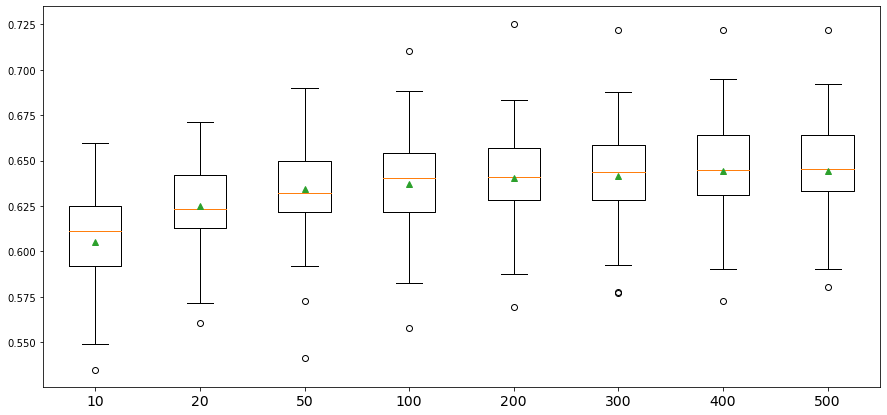

In [78]:
#Test n_estimators
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = RandomForestClassifier(n_estimators = value, random_state = 42, n_jobs = -1)      
    return models

models = get_models([10,20,50,100,200,300,400,500])
return_results(models)

__n_estimators = 200__

>True 0.637 (0.032)
>False 0.636 (0.028)


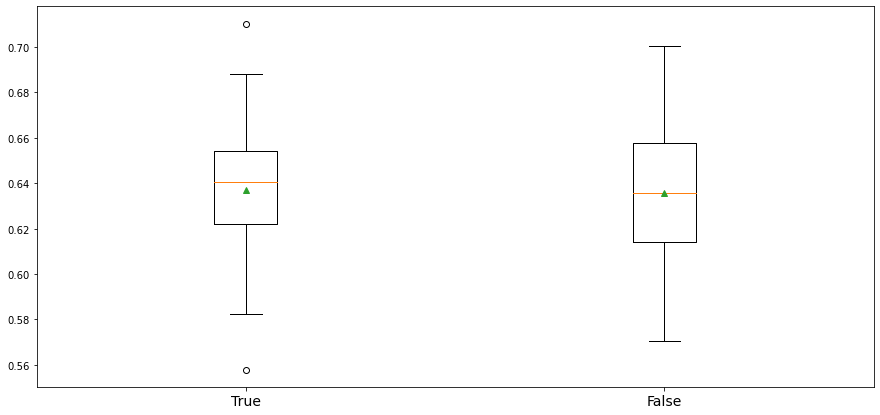

In [79]:
#Test for bootstrap
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = RandomForestClassifier(bootstrap = value, random_state = 42, n_jobs = -1)      
    return models

models = get_models([True, False])
return_results(models)

__bootstrap = True__

>0.2 0.637 (0.036)
>0.4 0.639 (0.030)
>0.6 0.643 (0.030)
>0.8 0.640 (0.034)
>None 0.637 (0.032)


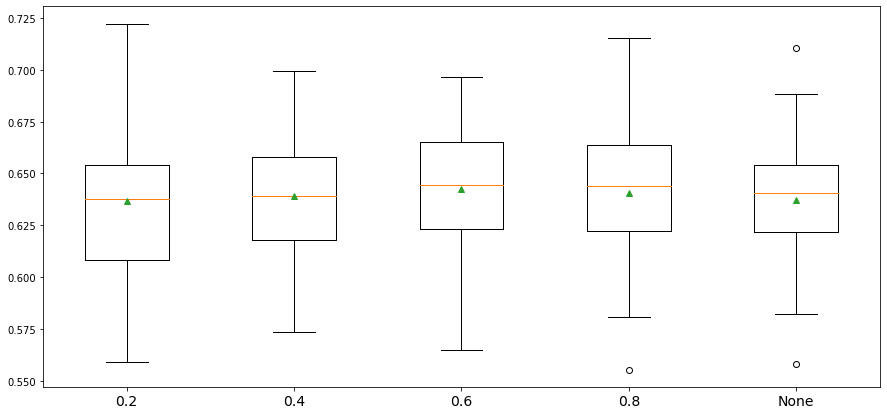

In [80]:
#Get number of samples to draw
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = RandomForestClassifier(max_samples = value, random_state = 42, n_jobs = -1)      
    return models

models = get_models([0.2,0.4,0.6,0.8,None])
return_results(models)

__max_samples = 0.8__

>4 0.536 (0.035)
>6 0.622 (0.030)
>8 0.642 (0.035)
>10 0.649 (0.032)
>12 0.644 (0.031)
>14 0.647 (0.035)
>16 0.647 (0.028)
>None 0.637 (0.032)


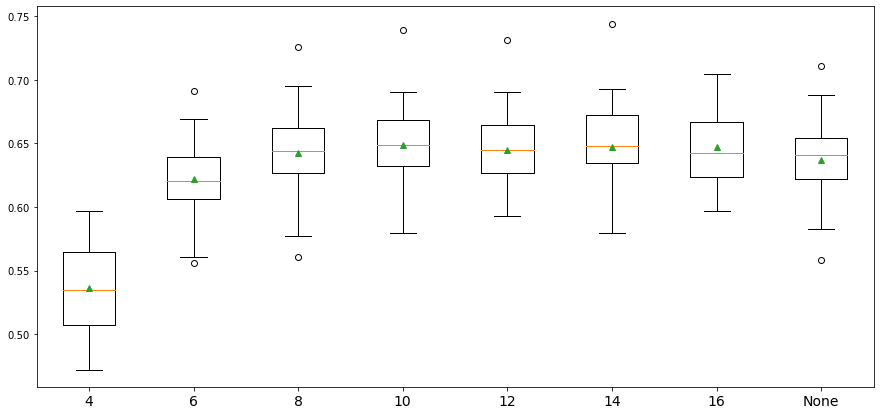

In [81]:
#maximum depth of tree
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = RandomForestClassifier(max_depth = value, random_state = 42, n_jobs=-1)      
    return models

models = get_models([4,6,8,10,12,14,16,None])
return_results(models)

__max_depth=12__

# Out of bag samples to check performance

In [82]:
ensemble_clfs = {
    "RF, max_features='sqrt'": RandomForestClassifier(oob_score=True, max_features="sqrt", random_state=42, n_jobs=-1),
    "RF, max_features='log2'": RandomForestClassifier(oob_score=True, max_features='log2', random_state=42, n_jobs=-1),
    "RF, max_features=None": RandomForestClassifier(oob_score=True, max_features=None,  random_state=42, n_jobs=-1),
}

In [83]:
# Range of `n_estimators` values to explore.
min_estimators = 160
max_estimators = 230

In [84]:
error_rate = dict((label, []) for label in ensemble_clfs)
for label, clf in ensemble_clfs.items():
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

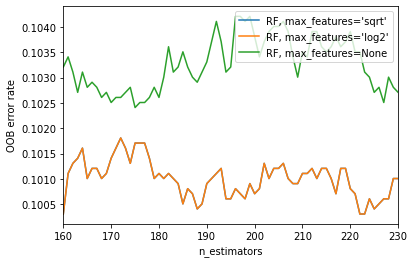

In [85]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

__n_estimators=169__ and __max_features='log2'__

## FINAL Classifier

In [87]:
rf_clf=RandomForestClassifier(n_estimators=169,bootstrap = True,max_samples = 0.8, max_features='log2',
                           max_depth=12, random_state=42, n_jobs=-1)
rf_clf.fit(X, y)

RandomForestClassifier(max_depth=12, max_features='log2', max_samples=0.8,
                       n_estimators=169, n_jobs=-1, random_state=42)

# Deploy

In [55]:
testdf = pd.read_csv('techscape-ecommerce/test.csv')

In [56]:
dates = pd.to_datetime(testdf.Date)
testdf['Date'] = dates.dt.month
testdf

,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor
0,798519314,8,0,0.00,0,0.000,86,5332.5478,0.0139,0.0654,0.0000,Windows,2,Brazil,1,Returner
1,798663101,5,2,37.50,0,0.000,55,1420.4725,0.0012,0.0058,0.0000,Android,1,Spain,4,Returner
2,798663221,11,0,0.00,0,0.000,36,788.5000,0.0000,0.0250,0.0000,Windows,6,Spain,3,Returner
3,798760918,5,0,0.00,0,0.000,2,689.0000,0.0000,0.1000,0.0000,Windows,2,Spain,2,New_Access
4,798856982,11,12,225.25,1,0.000,129,3367.0413,0.0014,0.0185,1.0353,Windows,4,Portugal,10,Returner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,962042726,11,10,720.50,2,88.725,220,10580.3448,0.0048,0.0221,0.0000,Windows,2,Portugal,1,Returner
2296,962063064,3,0,0.00,0,0.000,3,55.0000,0.0667,0.1000,0.0000,MacOSX,2,Spain,3,Returner
2297,962147749,11,2,45.50,0,0.000,22,535.0000,0.0000,0.0250,9.6503,Windows,2,Spain,11,Returner
2298,962182167,11,8,166.70,0,0.000,9,171.7000,0.0167,0.0500,0.0000,Windows,2,Portugal,3,Returner


In [57]:
testdf = testdf.set_index('Access_ID')
testdf

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor
Access_ID,,,,,,,,,,,,,,,
798519314,8,0,0.00,0,0.000,86,5332.5478,0.0139,0.0654,0.0000,Windows,2,Brazil,1,Returner
798663101,5,2,37.50,0,0.000,55,1420.4725,0.0012,0.0058,0.0000,Android,1,Spain,4,Returner
798663221,11,0,0.00,0,0.000,36,788.5000,0.0000,0.0250,0.0000,Windows,6,Spain,3,Returner
798760918,5,0,0.00,0,0.000,2,689.0000,0.0000,0.1000,0.0000,Windows,2,Spain,2,New_Access
798856982,11,12,225.25,1,0.000,129,3367.0413,0.0014,0.0185,1.0353,Windows,4,Portugal,10,Returner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962042726,11,10,720.50,2,88.725,220,10580.3448,0.0048,0.0221,0.0000,Windows,2,Portugal,1,Returner
962063064,3,0,0.00,0,0.000,3,55.0000,0.0667,0.1000,0.0000,MacOSX,2,Spain,3,Returner
962147749,11,2,45.50,0,0.000,22,535.0000,0.0000,0.0250,9.6503,Windows,2,Spain,11,Returner


In [58]:
#Drop OS
testdf.drop(['OS'],axis=1,inplace=True)

In [59]:
testdf.drop(['Browser','Country','AccountMng_Duration', 'FAQ_Duration', 'Product_Duration'], axis=1, inplace=True)
testdf

,Date,AccountMng_Pages,FAQ_Pages,Product_Pages,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Type_of_Traffic,Type_of_Visitor
Access_ID,,,,,,,,,
798519314,8,0,0,86,0.0139,0.0654,0.0000,1,Returner
798663101,5,2,0,55,0.0012,0.0058,0.0000,4,Returner
798663221,11,0,0,36,0.0000,0.0250,0.0000,3,Returner
798760918,5,0,0,2,0.0000,0.1000,0.0000,2,New_Access
798856982,11,12,1,129,0.0014,0.0185,1.0353,10,Returner
...,...,...,...,...,...,...,...,...,...
962042726,11,10,2,220,0.0048,0.0221,0.0000,1,Returner
962063064,3,0,0,3,0.0667,0.1000,0.0000,3,Returner
962147749,11,2,0,22,0.0000,0.0250,9.6503,11,Returner


In [60]:
#HOT ENCODING CATEGORICALS
typevisitor_ohe = pd.get_dummies(testdf.Type_of_Visitor, prefix='Visitor')
#Try with and without traffic
#typetraffic_ohe = pd.get_dummies(testdf.Type_of_Traffic, prefix='Traffic')

testdf_ohe = pd.concat([testdf, typevisitor_ohe,typetraffic_ohe], axis=1)
testdf_ohe.drop(['Type_of_Visitor'], axis=1, inplace=True)
testdf_ohe


,Date,AccountMng_Pages,FAQ_Pages,Product_Pages,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Visitor_New_Access,Visitor_Other,Visitor_Returner,...,Traffic_6,Traffic_7,Traffic_8,Traffic_9,Traffic_10,Traffic_11,Traffic_12,Traffic_13,Traffic_14,Traffic_15
Access_ID,,,,,,,,,,,,,,,,,,,,,
798519314,8,0,0,86,0.0139,0.0654,0.0000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
798663101,5,2,0,55,0.0012,0.0058,0.0000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
798663221,11,0,0,36,0.0000,0.0250,0.0000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
798760918,5,0,0,2,0.0000,0.1000,0.0000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
798856982,11,12,1,129,0.0014,0.0185,1.0353,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962042726,11,10,2,220,0.0048,0.0221,0.0000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
962063064,3,0,0,3,0.0667,0.1000,0.0000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
962147749,11,2,0,22,0.0000,0.0250,9.6503,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [62]:
#add preditictions to a new column iin the dataframe
testdf_ohe['Buy'] = rf_clf.predict(testdf_ohe)
testdf_ohe

,Date,AccountMng_Pages,FAQ_Pages,Product_Pages,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Visitor_New_Access,Visitor_Other,Visitor_Returner,...,Traffic_7,Traffic_8,Traffic_9,Traffic_10,Traffic_11,Traffic_12,Traffic_13,Traffic_14,Traffic_15,Buy
Access_ID,,,,,,,,,,,,,,,,,,,,,
798519314,8,0,0,86,0.0139,0.0654,0.0000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
798663101,5,2,0,55,0.0012,0.0058,0.0000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
798663221,11,0,0,36,0.0000,0.0250,0.0000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
798760918,5,0,0,2,0.0000,0.1000,0.0000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
798856982,11,12,1,129,0.0014,0.0185,1.0353,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962042726,11,10,2,220,0.0048,0.0221,0.0000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
962063064,3,0,0,3,0.0667,0.1000,0.0000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
962147749,11,2,0,22,0.0000,0.0250,9.6503,0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [64]:
Prediction_table = testdf_ohe[['Buy']]

#save table in a csv
Prediction_table.to_csv('pred_table_RF_droppedOS.csv')

In [65]:
Prediction_table

,Buy
Access_ID,
798519314,0
798663101,0
798663221,0
798760918,0
798856982,0
...,...
962042726,0
962063064,0
962147749,1
